In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter ='|')
df.head()

C:\Users\neimn\AppData\Local\Temp\ipykernel_7936\3253019206.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter ='|')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [3]:
df.tail()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0
1000097,31519,389,2015-02-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [4]:
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [6]:
df.shape

(1000098, 52)

In [7]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

**Save DataFrame as CSV**

In [8]:
df.to_csv('../data/MachineLearningRating_v3.csv', index = False)

**Descriptive Statistic**

In [9]:
df['total_premium'] = df['TotalPremium']

df['total_premium'].describe()

count    1.000098e+06
mean     6.190550e+01
std      2.302845e+02
min     -7.825768e+02
25%      0.000000e+00
50%      2.178333e+00
75%      2.192982e+01
max      6.528260e+04
Name: total_premium, dtype: float64

In [10]:
df['total_claims'] = df['TotalClaims']

df['total_claims'].describe()

count    1.000098e+06
mean     6.486119e+01
std      2.384075e+03
min     -1.200241e+04
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.930921e+05
Name: total_claims, dtype: float64

In [11]:
#variance
variance_premium = df['total_premium'].var()
variance_claims = df['total_claims'].var()

print(f"Variance of TotalPremium: {variance_premium}")
print(f"Variance of TotalClaims: {variance_claims}")

Variance of TotalPremium: 53030.956816024656
Variance of TotalClaims: 5683812.148962515


In [12]:
df.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [13]:
#Standard deviation
std_dev_premium = df['total_premium'].std()
std_dev_claims = df['total_claims'].std()

range_premium = df['total_premium'].max() - df['total_premium'].min()
range_claims = df['total_claims'].max() - df['total_claims'].min()

print(f"Standard Deviation of TotalPremium: {std_dev_premium}")
print(f"Standard Deviation of TotalClaims: {std_dev_claims}")
print(f"Range of TotalPremium: {range_premium}")
print(f"Range of TotalClaims: {range_claims}")

Standard Deviation of TotalPremium: 230.28451275764218
Standard Deviation of TotalClaims: 2384.07469450152
Range of TotalPremium: 66065.18017543857
Range of TotalClaims: 405094.5175438598


In [14]:
#categorical variables
df.select_dtypes(include=['object'])

,TransactionMonth,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,...,CrossBorder,TermFrequency,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType
0,2015-03-01 00:00:00,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,...,NaN,Monthly,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
1,2015-05-01 00:00:00,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,...,NaN,Monthly,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
2,2015-07-01 00:00:00,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,...,NaN,Monthly,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
3,2015-05-01 00:00:00,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,...,NaN,Monthly,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
4,2015-07-01 00:00:00,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,...,NaN,Monthly,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,2015-04-01 00:00:00,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,...,NaN,Monthly,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant
1000094,2015-06-01 00:00:00,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,...,NaN,Monthly,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant
1000095,2015-08-01 00:00:00,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,...,NaN,Monthly,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant
1000096,2014-07-01 00:00:00,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,...,NaN,Monthly,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant


In [15]:
df.select_dtypes(include=['float64'])

,mmcode,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims,total_premium,total_claims
0,44069150.0,6.0,2597.0,130.0,4.0,119300.0,NaN,0.01,25.0000,21.929825,0.0,21.929825,0.0
1,44069150.0,6.0,2597.0,130.0,4.0,119300.0,NaN,0.01,25.0000,21.929825,0.0,21.929825,0.0
2,44069150.0,6.0,2597.0,130.0,4.0,119300.0,NaN,0.01,25.0000,0.000000,0.0,0.000000,0.0
3,44069150.0,6.0,2597.0,130.0,4.0,119300.0,NaN,119300.00,584.6468,512.848070,0.0,512.848070,0.0
4,44069150.0,6.0,2597.0,130.0,4.0,119300.0,NaN,119300.00,584.6468,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,4614100.0,4.0,2693.0,110.0,4.0,NaN,NaN,500000.00,395.8481,347.235175,0.0,347.235175,0.0
1000094,4614100.0,4.0,2693.0,110.0,4.0,NaN,NaN,500000.00,395.8481,347.235175,0.0,347.235175,0.0
1000095,4614100.0,4.0,2693.0,110.0,4.0,NaN,NaN,500000.00,395.8481,347.235175,0.0,347.235175,0.0
1000096,4614100.0,4.0,2693.0,110.0,4.0,NaN,NaN,5000000.00,2.6391,2.315000,0.0,2.315000,0.0


In [16]:
df.select_dtypes(include=['int64'])

,UnderwrittenCoverID,PolicyID,PostalCode,RegistrationYear
0,145249,12827,1459,2004
1,145249,12827,1459,2004
2,145249,12827,1459,2004
3,145255,12827,1459,2004
4,145255,12827,1459,2004
...,...,...,...,...
1000093,31520,389,7493,2013
1000094,31520,389,7493,2013
1000095,31520,389,7493,2013
1000096,31519,389,7493,2013


In [17]:
df.select_dtypes(include=['bool'])

,IsVATRegistered
0,True
1,True
2,True
3,True
4,True
...,...
1000093,False
1000094,False
1000095,False
1000096,False


In [18]:
df.select_dtypes(include=['bool'])
pd.CategoricalDtype

pandas.core.dtypes.dtypes.CategoricalDtype

In [19]:
def encoder(method, dataframe, columns_label, columns_onehot):

    if not isinstance(method, str):
        raise ValueError("Method must be a string")
    if method not in ['labelEncoder', 'oneHotEncoder']:
        raise ValueError("Invalid method. Must be either 'labelEncoder' or 'oneHotEncoder'")

    if not isinstance(dataframe, pd.DataFrame):
        raise ValueError("Dataframe must be a pandas DataFrame")
    if not all(col in dataframe.columns for col in columns_label + columns_onehot):
        raise ValueError("All columns must exist in the dataframe")
    
    if method == 'labelEncoder':      
    
        df_lbl = dataframe.copy()
    
        for col in columns_label:
            label = LabelEncoder()
            label.fit(list(dataframe[col].values))
            df_lbl[col] = label.transform(df_lbl[col].values)
        
        return df_lbl
    
    elif method == 'oneHotEncoder':
        
        df_oh = dataframe.copy()

        df_oh= pd.get_dummies(data = df_oh, prefix = 'ohe', prefix_sep='_',
                    columns = columns_onehot,
                    drop_first =True,
                    dtype='int8')
        
        return df_oh

In [20]:
method =['labelEncoder', 'oneHotEncoder']
dataframe = df.copy()
columns_label = ['IsVATRegistered', 'Title', 'Gender']
columns_onehot = ['IsVATRegistered', 'Title', 'Gender', 'MaritalStatus']

df_label = encoder(method[0], dataframe, columns_label, columns_onehot)

df_onehot = encoder(method[1], dataframe, columns_label, columns_onehot)

df_label.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,total_premium,total_claims
0,145249,12827,2015-03-01 00:00:00,1,,Close Corporation,2,English,First National Bank,Current account,...,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,1,,Close Corporation,2,English,First National Bank,Current account,...,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,1,,Close Corporation,2,English,First National Bank,Current account,...,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,1,,Close Corporation,2,English,First National Bank,Current account,...,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,1,,Close Corporation,2,English,First National Bank,Current account,...,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,0.000000,0.0


In [21]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 54 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

(1000098, 54)

In [22]:
df['transaction_month']=df['TransactionMonth']
df['transaction_month'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

In [23]:
df.head(5)

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,total_premium,total_claims,transaction_month
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,21.929825,0.0,2015-03-01
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,21.929825,0.0,2015-05-01
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,0.000000,0.0,2015-07-01
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0,512.848070,0.0,2015-05-01
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,0.000000,0.0,2015-07-01


In [24]:
def scaler(method, data, columns_scaler):
        if method == 'standartScaler':
            Standard = StandardScaler()
            df_standard = data.copy()
            df_standard[columns_scaler]=Standard.fit_transform(df_standard[columns_scaler])        
            return df_standard
        
        elif method == 'minMaxScaler':        
            MinMax= MinMaxScaler()
            df_minmax = data.copy()
            df_minmax[columns_scaler]=MinMax.fit_transform(df_minmax[columns_scaler])        
            return df_minmax
    
        elif method =='npLog':        
            df_nplog = data.copy()
            df_nplog[columns_scaler]=np.log(df_nplog[columns_scaler])        
            return df_nplog
    
        elif method == 'default':

            return data

In [25]:
method = 'minMaxScaler'
data = df_label
columns_scaler = ['TotalPremium']
df_scaler = scaler(method, data, columns_scaler)

In [26]:
df_scaler.head(5)

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,total_premium,total_claims
0,145249,12827,2015-03-01 00:00:00,1,,Close Corporation,2,English,First National Bank,Current account,...,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.012177,0.0,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,1,,Close Corporation,2,English,First National Bank,Current account,...,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.012177,0.0,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,1,,Close Corporation,2,English,First National Bank,Current account,...,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.011846,0.0,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,1,,Close Corporation,2,English,First National Bank,Current account,...,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.019608,0.0,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,1,,Close Corporation,2,English,First National Bank,Current account,...,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.011846,0.0,0.000000,0.0


In [27]:
def missing_values_table(df):
        mis_val = df.isnull().sum()

        mis_val_percent = 100 * df.isnull().sum() / len(df)

        mis_val_dtype = df.dtypes

        mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

        mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values', 2: 'Dtype'})

        mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")

        return mis_val_table_ren_columns
# print(f"Missing values: {missing_values_table(df)}")
missing_values_table(df)

Your selected dataframe has 55 columns.
There are 22 columns that have missing values.


,Missing Values,% of Total Values,Dtype
NumberOfVehiclesInFleet,1000098,100.0,float64
CrossBorder,999400,99.9,object
CustomValueEstimate,779642,78.0,float64
WrittenOff,641901,64.2,object
Converted,641901,64.2,object
Rebuilt,641901,64.2,object
NewVehicle,153295,15.3,object
Bank,145961,14.6,object
AccountType,40232,4.0,object
Gender,9536,1.0,object


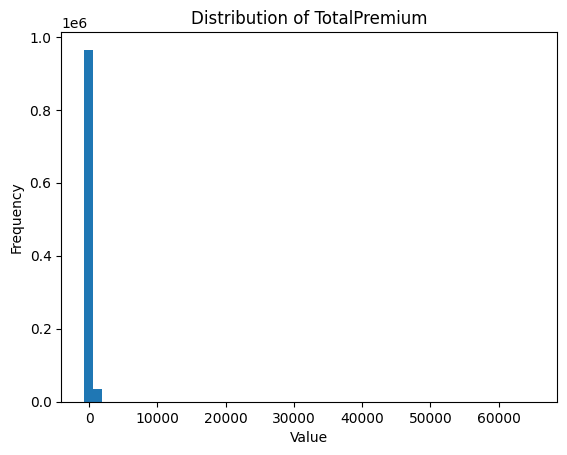

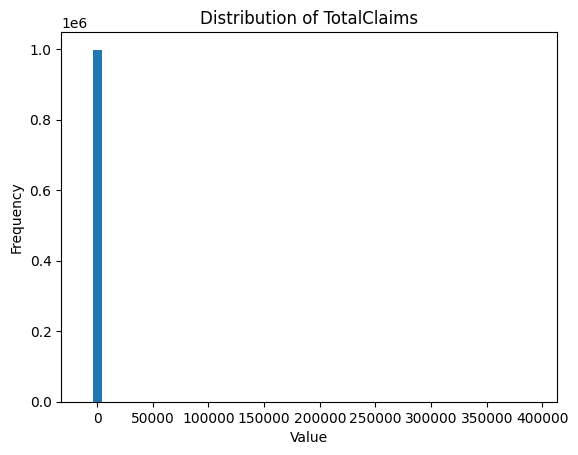

count    1.000098e+06
mean     6.190550e+01
std      2.302845e+02
min     -7.825768e+02
25%      0.000000e+00
50%      2.178333e+00
75%      2.192982e+01
max      6.528260e+04
Name: TotalPremium, dtype: float64


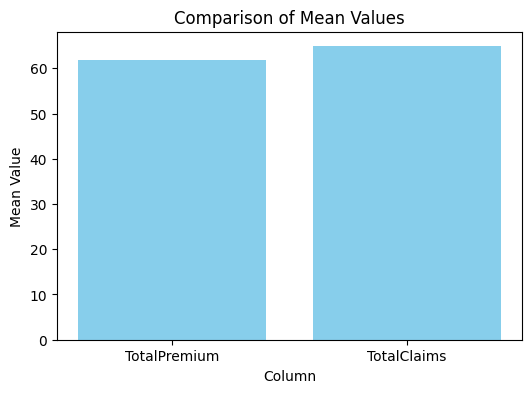

In [28]:
# Plot distribution of TotalPremium and TotalClaims
df['TotalPremium'].plot(kind='hist', bins=50)
plt.title('Distribution of TotalPremium')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

df['TotalClaims'].plot(kind='hist', bins=50)
plt.title('Distribution of TotalClaims')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics of TotalPremium
print(df['TotalPremium'].describe())

# Calculate and plot mean values
mean_premium = df['TotalPremium'].mean()
mean_claims = df['TotalClaims'].mean()

plt.figure(figsize=(6, 4))
plt.bar(['TotalPremium', 'TotalClaims'], [mean_premium, mean_claims], color='skyblue')
plt.xlabel('Column')
plt.ylabel('Mean Value')
plt.title('Comparison of Mean Values')
plt.xticks()
plt.show()